In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt


In [ ]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
print(my_data.shape)
print(my_data.head()) 
print(my_data.columns)

(200, 6)
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
print(my_data.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [ ]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

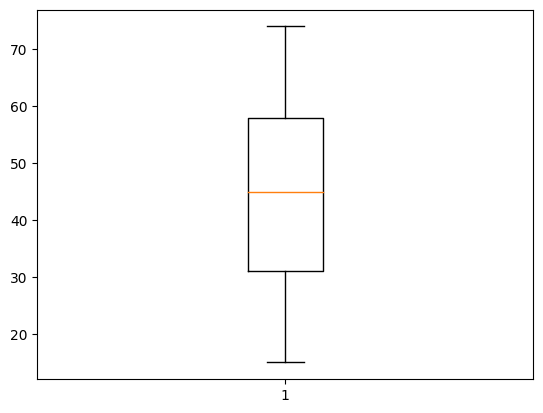

In [ ]:
plt.boxplot(my_data['Age']) 
plt.show()

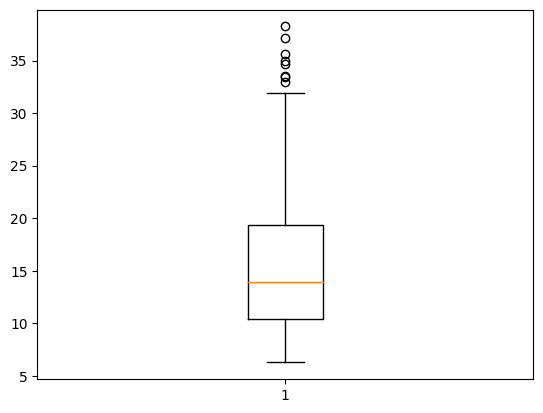

In [ ]:
plt.boxplot(my_data['Na_to_K']) 
plt.show()

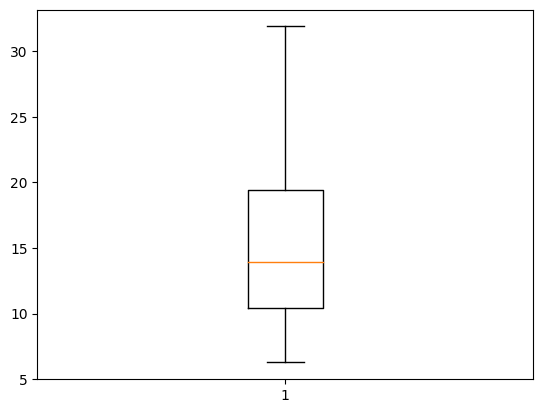

In [ ]:
Age_col_df = pd.DataFrame(my_data['Na_to_K']) 
Age_median = Age_col_df.median()
Q3 = Age_col_df.quantile(q=0.75) 
Q1 = Age_col_df.quantile(q=0.25)
IQR = Q3-Q1
IQR_LL = int(Q1 - 1.5*IQR) 
IQR_UL = int(Q3 + 1.5*IQR)
my_data.loc[my_data['Na_to_K']>IQR_UL , 'Na_to_K'] = int(Age_col_df.quantile(q=0.90)) 
my_data.loc[my_data['Na_to_K']<IQR_LL , 'Na_to_K'] = int(Age_col_df.quantile(q=0.01))
max(my_data['Na_to_K']) 
plt.boxplot(my_data['Na_to_K']) 
plt.show()

In [ ]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.


In [ ]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:

print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))


Shape of X training set (140, 5) &  Size of Y training set (140,)


In [ ]:

print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))


Shape of X training set (60, 5) &  Size of Y training set (60,)


In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predTree = drugTree.predict(X_testset)

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


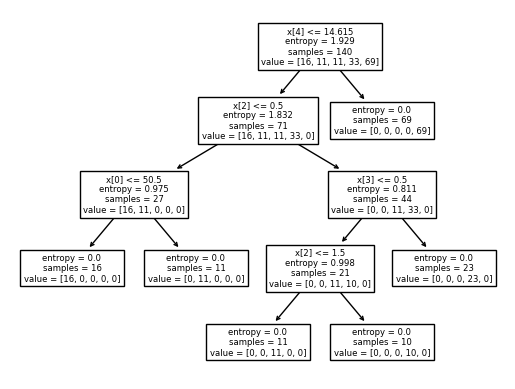

In [ ]:
tree.plot_tree(drugTree)
plt.show()